In [ ]:
# !pip install hdbscan
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 6.4MB 3.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311678 sha256=9530ab0cb3a5a417277e0cbe5441b97860c359dbacac8da39c8fc05c06619d1e
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [ ]:
sns.set(style='white', rc={'figure.figsize':(10,8)})

In [ ]:
mnist = fetch_openml('Fashion-MNIST', version=1)
mnist.target = mnist.target.astype(int)

In [ ]:
mnist.target

array([9, 0, 0, ..., 8, 1, 5])

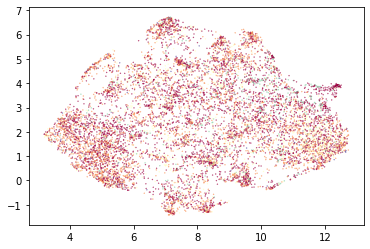

In [ ]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(X)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=y, s=0.1, cmap='Spectral');

In [ ]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(mnist.data)

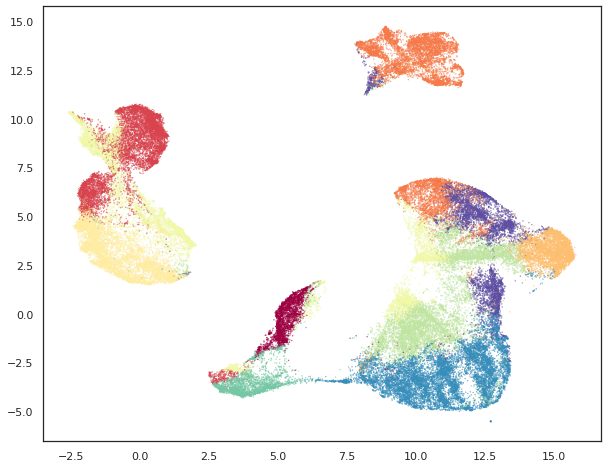

In [ ]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');

In [ ]:
(
    adjusted_rand_score(mnist.target, kmeans_labels),
    adjusted_mutual_info_score(mnist.target, kmeans_labels)
)

(0.38486542942077084, 0.52880072879408)

In [ ]:
lowd_mnist = PCA(n_components=50).fit_transform(mnist.data)
hdbscan_labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit_predict(lowd_mnist)

In [ ]:
clustered = (hdbscan_labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=hdbscan_labels[clustered],
            s=0.1,
            cmap='Spectral');

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Sentence Embeddings/50D/Only Dimensions')


In [ ]:
os.listdir()

['50D_150k_w_test_df0_wout_lbls.csv',
 '50D_150k_w_test_df1_wout_lbls.csv',
 '50D_150k_w_test_df2_wout_lbls.csv',
 '50D_150k_w_test_df3_wout_lbls.csv',
 '50D_150k_w_test_df4_wout_lbls.csv',
 '50D_150k_w_test_df5_wout_lbls.csv',
 '50D_150k_w_test_df6_wout_lbls.csv',
 '50D_150k_w_test_df7_wout_lbls.csv',
 '50D_150k_w_test_df8_wout_lbls.csv',
 '50D_150k_w_test_df9_wout_lbls.csv']

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Sentence Embeddings/50D/50D_150k_w_test_df0.csv',sep = " ")

In [ ]:
df1 = df.drop("index",axis = 1)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Sentence Embeddings/50D/Only Labels/50D_150k_w_test_df0_only_lbls.csv',sep = " ")

In [ ]:
df3 = df2.drop(["index","train/test"],axis = 1)

In [ ]:
y = df1["target"].to_numpy().flatten()

In [ ]:
df_test = df[df['train/test'] == 1]

In [ ]:
df_train = df[df['train/test'] == 0]

In [ ]:
df_samp = pd.DataFrame(tot,columns = list(df.columns))

In [ ]:
X = df_samp.iloc[:,:-2].to_numpy()

In [ ]:
y = df_samp.iloc[:,-2:-1].to_numpy().flatten()

In [ ]:
tr_ts = df_samp.iloc[:,-1:]

In [ ]:
df_samp

,xs0,xs1,xs2,xs3,xs4,xs5,xs6,xs7,xs8,xs9,xs10,xs11,xs12,xs13,xs14,xs15,xs16,xs17,xs18,xs19,xs20,xs21,xs22,xs23,xs24,xs25,xs26,xs27,xs28,xs29,xs30,xs31,xs32,xs33,xs34,xs35,xs36,xs37,xs38,xs39,xs40,xs41,xs42,xs43,xs44,xs45,xs46,xs47,xs48,xs49,target,train/test
0,-0.005209,-0.178636,-0.152796,-0.045543,-0.134345,0.150645,-0.143343,-0.275042,0.173388,-0.064909,0.020465,0.004188,0.216743,-0.046761,0.128210,0.044824,-0.205142,0.014224,0.018329,-0.119038,-0.150738,-0.056050,0.120442,-0.006255,-0.186880,0.163901,0.020640,0.055947,0.101722,0.125018,0.156621,0.143255,-0.180793,-0.111614,-0.229873,0.064273,-0.065883,0.228611,-0.090179,-0.137181,0.079840,0.027513,0.010308,-0.089294,-0.105422,-0.025066,0.033390,-0.019289,0.005125,0.034433,0.0,0.0
1,0.000930,-0.049250,0.094228,-0.056524,0.048453,0.170006,-0.061745,0.105143,-0.040509,0.078505,0.088545,0.204982,0.100516,-0.050910,-0.074151,-0.046744,0.058877,0.046746,0.103518,-0.085513,0.171856,-0.129665,0.017189,-0.153149,-0.035905,0.033975,-0.017032,-0.056092,0.048518,0.056960,0.025808,0.078781,-0.013451,0.076951,-0.076841,-0.040007,-0.067470,0.072361,0.016355,-0.169989,-0.034141,-0.020949,-0.227097,0.117078,0.110907,0.068790,-0.048885,0.113103,-0.116839,-0.146857,4.0,0.0
2,-0.181302,0.036154,0.114754,-0.186079,-0.110324,-0.107058,-0.078561,-0.070163,-0.124141,-0.064615,-0.323466,-0.088137,-0.245080,-0.011490,-0.114437,0.187805,-0.203524,0.066485,0.099353,-0.113726,0.110754,0.056179,0.085249,0.156239,0.071808,-0.039332,-0.046937,0.032851,-0.101647,0.109761,0.046812,-0.011205,0.046506,0.032588,0.251077,0.167534,-0.081208,-0.138936,-0.029704,0.039514,0.022782,0.006070,0.063535,0.076600,-0.007747,-0.098000,0.031965,0.023714,-0.069744,0.054020,1.0,0.0
3,-0.227865,0.212146,-0.165716,-0.209294,-0.062135,-0.111276,-0.152004,0.092127,0.063182,0.188379,-0.041630,-0.180412,-0.003913,-0.235172,-0.079461,-0.078755,-0.003435,0.005854,0.033095,0.046549,0.060213,0.048866,-0.032721,0.260436,-0.046881,-0.061660,0.072012,-0.003022,-0.136285,-0.060831,0.015694,0.018390,-0.112547,0.105517,0.024268,0.117346,-0.152701,0.041707,0.038708,0.034178,-0.072390,0.084348,-0.158330,-0.062254,0.055649,-0.195252,-0.152503,0.184774,-0.071602,0.016952,0.0,0.0
4,0.001835,0.471776,-0.186751,-0.212880,-0.191434,0.003927,0.172857,0.099749,-0.003141,0.123088,-0.058472,-0.109440,0.093040,-0.134615,0.064522,0.139289,-0.170169,0.041420,0.073372,0.081256,-0.189729,0.026777,-0.031231,-0.086443,-0.069055,0.011071,0.011768,-0.040230,-0.188714,0.084806,0.023298,0.120683,0.006138,-0.045062,-0.061414,0.132197,-0.074704,0.064742,-0.004288,-0.001166,0.069379,-0.042320,-0.006533,-0.073918,0.116453,0.039692,-0.068066,0.122815,0.003133,0.052063,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.049568,-0.024973,0.121132,-0.010628,-0.072076,0.407327,0.098717,0.137788,-0.221965,0.177161,-0.056236,0.188458,0.170036,0.138561,0.072710,-0.053411,-0.028550,0.030819,-0.003426,-0.162221,-0.085132,0.025731,-0.014037,0.032721,0.020080,-0.104685,-0.124382,-0.027478,0.127911,0.011144,0.089073,0.123527,-0.046696,-0.159105,-0.221384,0.100574,0.015026,-0.057695,0.000101,-0.113292,0.030368,-0.162188,0.005225,-0.019641,-0.004585,0.014540,-0.052245,0.104371,-0.049302,0.045428,0.0,1.0
9996,-0.040096,-0.148789,-0.109069,-0.086113,0.078889,0.039000,-0.321114,0.065305,-0.133550,0.007918,-0.075420,0.290588,-0.113221,-0.031567,-0.266152,0.008023,-0.037167,0.247213,0.113375,-0.011300,0.012240,-0.003623,0.040142,0.067521,0.086966,-0.015774,-0.032156,0.003862,-0.048646,-0.000868,-0.079220,0.046470,-0.063237,-0.045322,-0.065975,-0.049410,0.042557,0.053476,0.021907,-0.118180,-0.017205,0.084299,-0.062245,0.031441,0.011010,-0.185683,0.028508,-0.003614,-0.014328,-0.065466,1.0,1.0
9997,0.412813,0.383057,0.039336,-0.130037,0.132015,0.156340,-0.097998,-0.062093,-0.089655,0.033846,-0.039038,-0.127665,0.0794

In [ ]:
df_tr = df_train.sample(5000)
df_ts = df_test.sample(5000)

In [ ]:
X = df4.to_numpy()

In [ ]:
df4 = df1.sample(n = 10000)

In [ ]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.2,
    n_components=2,
).fit_transform(X)

In [ ]:
X.shape

(10000, 50)

In [ ]:
df_complex = pd.DataFrame(np.concatenate((standard_embedding,tr_ts),axis = 1),columns=["x","y","tr_ts"])

In [ ]:
df_tr_2D = df_complex[df_complex["tr_ts"] == 0]
df_ts_2D = df_complex[df_complex["tr_ts"] == 1]

tr1 = df_tr_2D.drop("tr_ts",axis=1).to_numpy()
ts1 = df_ts_2D.drop("tr_ts",axis=1).to_numpy()

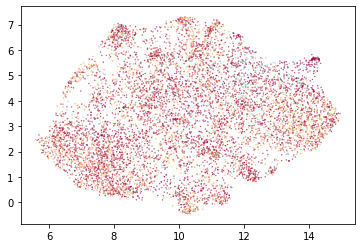

In [ ]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=y, s=0.1, cmap='Spectral');

In [ ]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=100,
).fit_predict(clusterable_embedding)


In [ ]:
lbls = cluster.KMeans(n_clusters=5).fit_predict(clusterable_embedding)

In [ ]:
clustered

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
df_cl_yes = pd.read_csv("/content/drive/MyDrive/Sentence Embeddings/50D_df0_clustered.csv")

In [ ]:
lbls_comp = df_cl_yes['cluster'].to_numpy()

In [ ]:
X_clus = df_cl_yes.iloc[:,:-2].to_numpy()

In [ ]:
se_clus = umap.UMAP(random_state=42).fit_transform(X_clus)
# plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=y, s=0.1, cmap='Spectral');

In [ ]:
tr1.shape

(5000, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


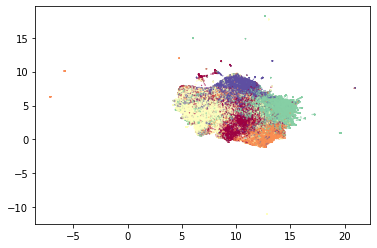

In [ ]:
clustered = (lbls_comp >= 0)
# plt.scatter(standard_embedding[~clustered, 0],
#             standard_embedding[~clustered, 1],
#             c=(0.5, 0.5, 0.5),
#             s=0.1,
#             alpha=0.5)
# plt.scatter(tr1[~clustered_tr,0],
#             tr1[~clustered_tr,1],
#             s=0.1,
#             c=(0.75, 0.75, 0.75),
#             marker = 'o',
#             alpha=0.95);


# plt.scatter(tr1[clustered_tr,0],
#             tr1[clustered_tr,1],
#             s=0.75,
#             c=lbls_tr[clustered_tr],
#             marker = 'o',
#             cmap='Spectral',
#             alpha = 0.25)

# # plt.scatter(ts1[~clustered_ts, 0],
# #             ts1[~clustered_ts, 1],
# #             c=(0.75, 0.75, 0.75),
# #             s=0.1,
# #             marker = 'x',
# #             alpha=0.95)

# plt.scatter(ts1[clustered_ts, 0],
#             ts1[clustered_ts, 1],
#             c=lbls_ts[clustered_ts],
#             s=0.75,
#             marker = 'x',
#             cmap='Spectral',
#             alpha = 0.25)

# plt.scatter(standard_embedding[clustered, 0],
#             standard_embedding[clustered, 1],
#             c=lbls[clustered],
#             s=0.1,
#             cmap='Spectral');



clustered = (lbls_comp >= 0)
plt.scatter(se_clus[~clustered, 0],
            se_clus[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.05)
plt.scatter(se_clus[clustered, 0],
            se_clus[clustered, 1],
            c=lbls_comp[clustered],
            s=0.1,
            cmap='Spectral');


In [ ]:
clustered_tr = clustered[:5000]
clustered_ts = clustered[5000:]

In [ ]:
lbls_tr = lbls[:5000]
lbls_ts = lbls[5000:]

In [ ]:
clustered = (lbls >= 0)
(
    adjusted_rand_score(y[clustered], lbls[clustered]),
    adjusted_mutual_info_score(y[clustered], lbls[clustered])
)

(0.006025671477299661, 0.011088600283430764)

In [ ]:
np.sum(clustered) / X.shape[0]


0.706999306999307

In [ ]:
from nltk.cluster import GAAClusterer
import nltk

In [ ]:
gaacclusterer = GAAClusterer(5,normalise = False)
assigned_gaac = gaacclusterer.cluster(X,assign_clusters = True)

In [ ]:
kclusterer = KMeansClusterer(
        5, distance=nltk.cluster.util.cosine_distance,
        repeats=25,avoid_empty_clusters=True)

assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

df1['cluster'] = pd.Series(assigned_clusters, index=df1.index)
df1['centroid'] = df1['cluster'].apply(lambda x: kclusterer.means()[x])

    

In [ ]:
X.shape

(10000, 50)

In [ ]:
df1_csv('/content/drive/MyDrive/Sentence Embeddings/50D_df0_clustered.csv',index = False,header = True)

NameError: ignored

In [ ]:
import numpy as np
import tensorflow as tf

def np_cosine_similarity(u, v):
  u = np.expand_dims(u, 1)
  n = np.sum(u * v, axis=2)
  d = np.linalg.norm(u, axis=2) * np.linalg.norm(v, axis=1)

  return n / d

@tf.function
def tf_cosine_similarity(u, v):
  u = tf.expand_dims(u, 1)

  n = tf.reduce_sum(u * v, axis=2)
  d = tf.linalg.norm(u, axis=2) * tf.linalg.norm(v, axis=1)

  return n / d

# Generate random data
x = np.random.rand(1, 5)
y = np.random.rand(1, 5)

# print("x:", "\n", x)
# print("y:", "\n", y)

# # Print cosine similarity in NumPy and TensorFlow
# print("np:", "\n", np_cosine_similarity(x, y))
print("tf:", "\n", tf_cosine_similarity(x, y).numpy())

tf: 
 [[0.86540771]]


In [ ]:
x = df_tr.to_numpy()
y = df_ts.to_numpy()

In [ ]:
# res = tf_cosine_similarity(x, y).numpy()


0.644714969476882

In [ ]:
import numpy as np
tot = np.concatenate((x,y),axis=0)

In [ ]:
tot.shape

(10000, 52)

In [ ]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation().fit(tot)

KeyboardInterrupt: ignored

In [ ]:
clustering.shape

(10000,)